# Benchmark of Magnetometer Interference Removal Algorithms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.lines import Line2D
import numpy as np
import magpylib as magpy
import scipy.spatial.transform as st

## Benchmark A
Benchmark A simulates 4 interference sources in a 3U CubeSat, and two magnetometers in a gradiometry configuration on a 60 cm boom. The inboard magnetometer is located at the 30 cm midpoint, and the outboard magnetometer is located at the end of the 60 cm boom

In [43]:
df = pd.read_csv(r'magprime_results_A.csv')

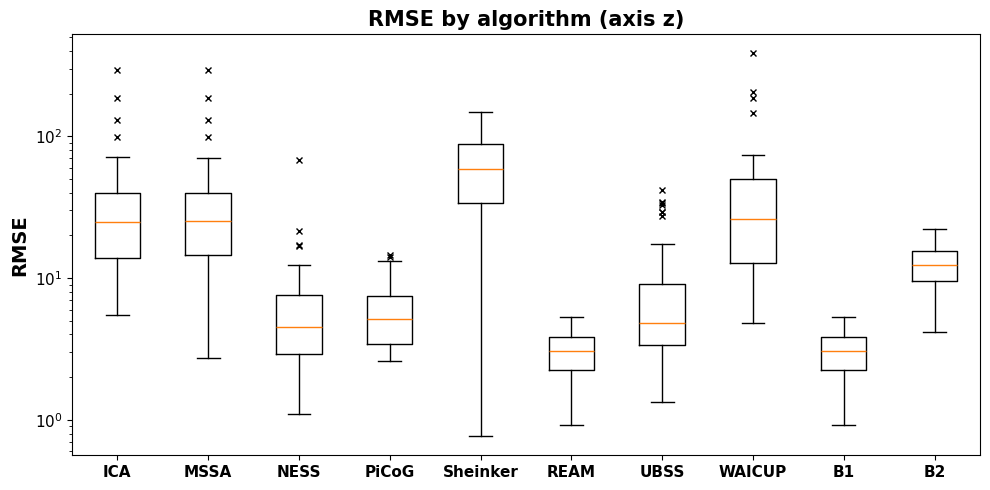

In [68]:
ALG_ORDER = ["ica","mssa","ness","picog","sheinker","ream","ubss","waicup","b1","b2"]
LABELS    = ["ICA","MSSA","NESS","PiCoG","Sheinker","REAM","UBSS","WAICUP","B1","B2"]

def boxplot_metric(df, base_metric="corr", axis='x', log=False, ylabel=None, title=None):
    """
    base_metric: 'rmse', 'corr', 'snr', etc.
    axis: 'x' 'y' or 'z'
    """
    cols = [f"{base_metric}_{alg}" for alg in ALG_ORDER]
    sub = df[df['axis'] == axis]
    if sub.empty:
        raise ValueError(f"No rows for axis {axis}. Found {df['axis'].unique()}")
    data = [sub[c].values for c in cols]

    fig, ax = plt.subplots(figsize=(10,5))
    ax.boxplot(data, flierprops=dict(marker='x', markersize=4))
    ax.set_xticklabels(LABELS, fontsize=12, fontweight='bold', rotation=0)
    if ylabel is None:
        ylabel = base_metric.upper()
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
    if title is None:
        title = f"{ylabel} by algorithm (axis {axis})"
    ax.set_title(title, fontsize=15, fontweight='bold')
    if log:
        ax.set_yscale('log')
    ax.tick_params(labelsize=11)
    plt.tight_layout()
    plt.show()

# Example for correlation on Z axis:
boxplot_metric(df, base_metric="rmse", axis='z', log=True, ylabel="RMSE")

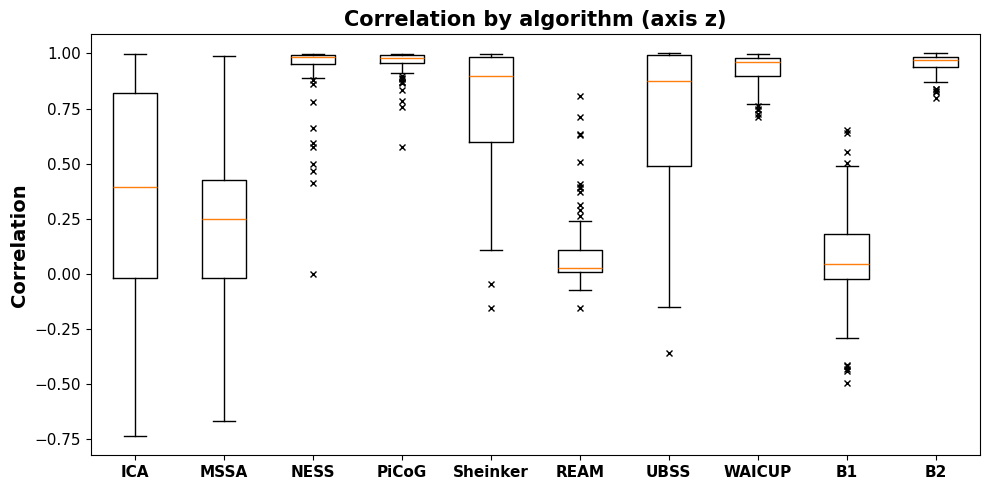

In [34]:
boxplot_metric(df, base_metric="corr", axis='z', log=False, ylabel="Correlation")

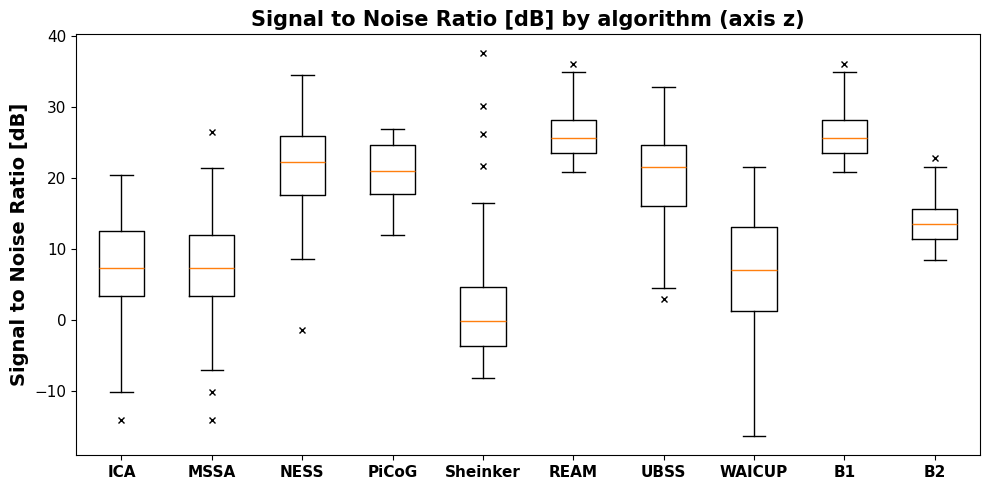

In [67]:
boxplot_metric(df, base_metric="snr", axis='z', log=False, ylabel="Signal to Noise Ratio [dB]")

In [70]:
df = pd.read_csv(r'magprime_results_B.csv')

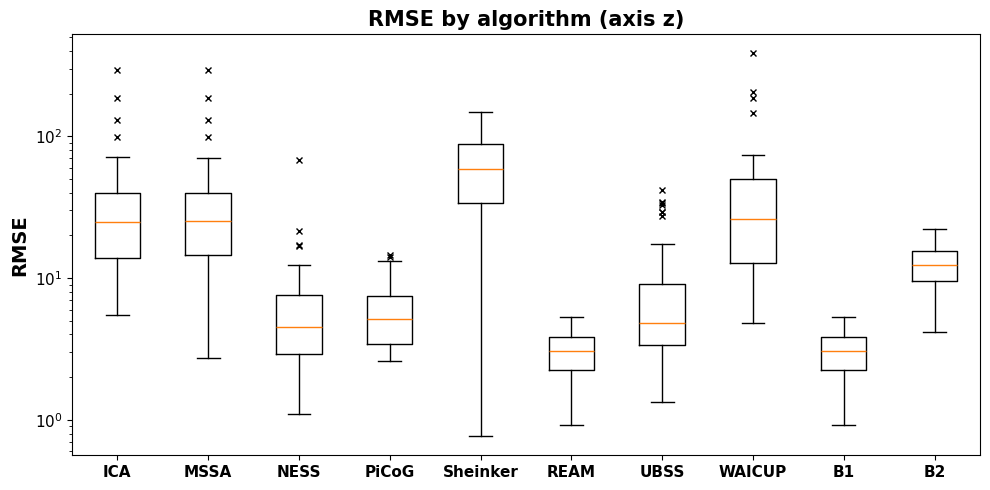

In [71]:
boxplot_metric(df, base_metric="rmse", axis='z', log=True, ylabel="RMSE")

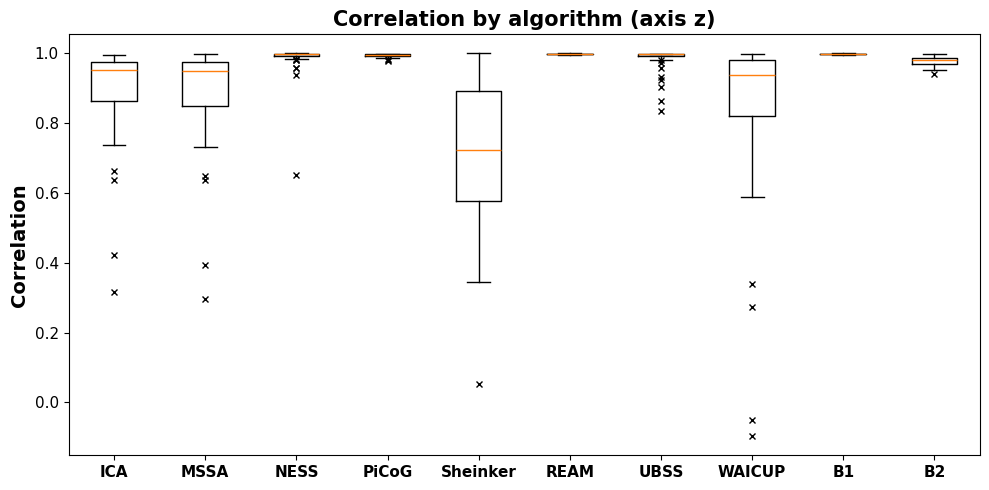

In [65]:
boxplot_metric(df, base_metric="corr", axis='z', log=False, ylabel="Correlation")

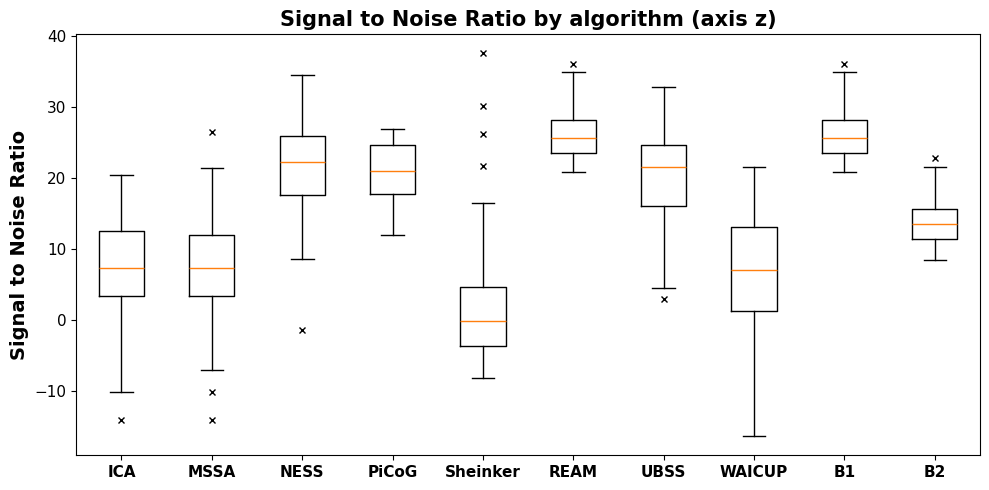

In [69]:
boxplot_metric(df, base_metric="snr", axis='z', log=False, ylabel="Signal to Noise Ratio")